    (license note at the end of the file or https://github.com/compaes/Visual-Contour)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mvilavidal/Visual-Contour/blob/main/Visual%20contour%20tutorial.ipynb)

# Visual contour tutorial

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True,font_scale=2)

We generated a novel stimulus set consisting of black contours (closed lines) on white background varying systematically in the number of alternating inward and outward vertexes (_v_) or curve apices within two concentric circumferences, the distance (_d_) between contiguous vertexes (0.0–1.0, normalized units), and the tension (_t_) of the curve connecting them (0.0–1.0).

To generate the contour set we proceeded as follows. First, we drew two rings separated by a distance _D_ (more specifically with radiuses _1.5±D_ ) with _D_ ranging from 0 to 3 (0 corresponding to two fully overlapping rings and 3 to a point and a ring). We then placed half of the vertices (_N=v/2_) along the inner ring and the other half along the outer ring. For each pair of consecutive vertices from the outer axis, we placed a vertex on the inner axis at the average angle of the two vertices on the outer axis.

To incorporate independent variability, we added small random shifts to each vertex both in the radial and angular directions —following a normal distribution with standard deviation _sr = 0.2 * D_ along the radial direction, and a normal distribution with angular standard deviation _sa = 0.2 * 2π/N_ (in radians) along the angular direction—. After adding the random shifts, we inspected stimuli generated for different values of D and observed that values above 1.3 often yielded inconsistent results. We thus restricted _D_ in the range 0–1.3 and rescaled this parameter to 0–1, obtaining the aforementioned parameter _d_.

Finally, minimal tension _t_ (0.0) is defined by a cubic Hermite spline interpolating the vertexes, whereas maximal tension (1.0) corresponds to straight lines forming a polygon. Stimuli with intermediate tension values were obtained by linear interpolation between maximal and minimal tension curves.

We obtain the whole contour set by varying the following parameters:
* Total number of vertices _v_.
* Distance between outer and inner rings _d_.
* The parameter tension of the interpolation _t_.


## Examples to understand the interpolation

In [2]:
# Interpolation function

def cardinalCubicHermiteSpline(s,x,sinterp,t=0,ends=False):
    # t is the tension parameter
    [N,dim]=x.shape
    m=np.zeros(x.shape)
    k=0
    m[k]=(1-t)*(x[k+1]-x[k])/(s[k+1]-s[k])
    for k in range(1,N-1):
        m[k]=(1-t)*(x[k+1]-x[k-1])/(s[k+1]-s[k-1])
    k+=1
    m[k]=(1-t)*(x[k]-x[k-1])/(s[k]-s[k-1])
    
    Ninterp=sinterp.size
    xinterp=[]
    for i in range(Ninterp):
        ss=sinterp[i]
        k=np.where(s<=ss)[0][-1]
        if ((k==0)+(k==N-1)+(k==N-2))*(ends==False): continue
        if (k==N-1)*(ends==True):
            xinterp+=[x[-1]]
            break
        sk=(ss-s[k])/(s[k+1]-s[k])
        xinterp+=[(2*sk**3-3*sk**2+1)*x[k]  +  (sk**3-2*sk**2+sk)*m[k]  +  (-2*sk**3+3*sk**2)*x[k+1]  +  (sk**3-sk**2)*m[k+1]]
    
    return np.array(xinterp)

In the following example we design a simple figure and use the interpolation function with different tension values to smoothen the perimeter of the figure:

Text(0.5, 1.0, 'Points defined by (x,y), sharp lines')

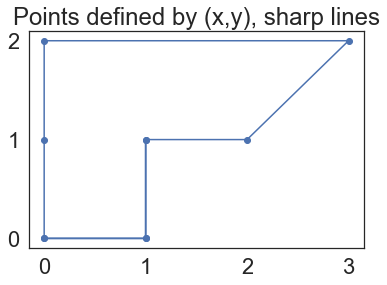

In [3]:
x=np.array([0,1,1,2,3,0,0,0,1,1])
y=np.array([0,0,1,1,2,2,1,0,0,1])

plt.figure(1)
plt.plot(x,y,'o-')
plt.title('Points defined by (x,y), sharp lines')

Text(0.5, 1.0, 'Points defined by (x,y), straight lines vs. curves at tension=0')

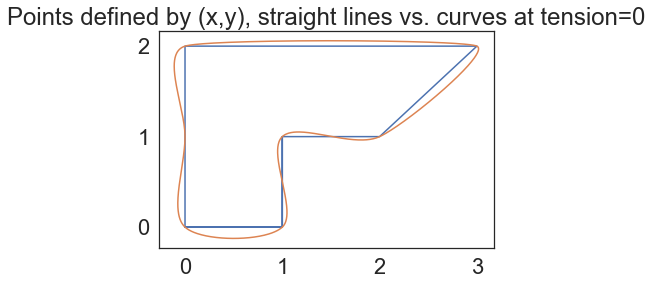

In [4]:
# parametrisation of (x,y) using distance of segments:
s=np.array([0,1,2,3,3+np.sqrt(2),3+np.sqrt(2)+3,3+np.sqrt(2)+4,3+np.sqrt(2)+5,3+np.sqrt(2)+6,3+np.sqrt(2)+7])

F=np.vstack((x,y))
F=np.transpose(F)

t=0
Fn=cardinalCubicHermiteSpline(s,F,np.linspace(0,3+np.sqrt(2)+7,1000),t=t)

plt.figure(2)
plt.plot(x,y)
plt.plot(Fn[:,0],Fn[:,1])
plt.title('Points defined by (x,y), straight lines vs. curves at tension='+str(round(t,2)))

Text(0.5, 1.0, 'Points defined by (x,y), straight lines vs. curves at tension=0.5')

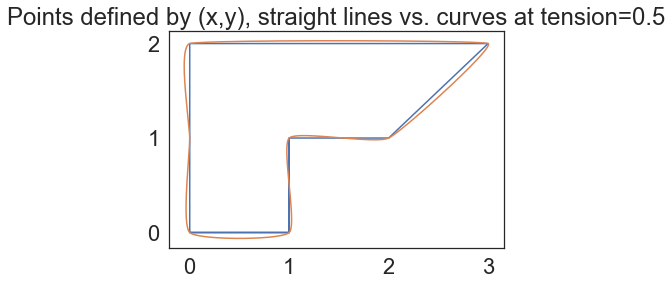

In [5]:
t=0.5
Fn=cardinalCubicHermiteSpline(s,F,np.linspace(0,3+np.sqrt(2)+7,1000),t=t)

plt.figure(2)
plt.plot(x,y)
plt.plot(Fn[:,0],Fn[:,1])
plt.title('Points defined by (x,y), straight lines vs. curves at tension='+str(round(t,2)))

Text(0.5, 1.0, 'Points defined by (x,y), straight lines vs. curves at tension=0.9')

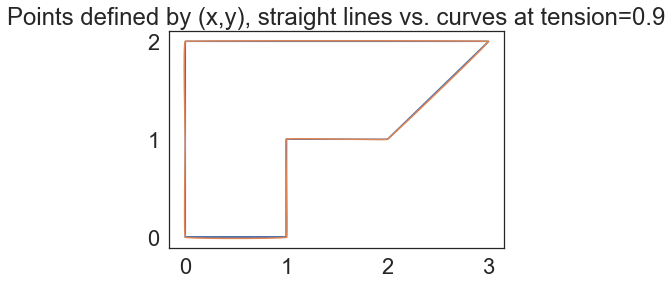

In [6]:
t=0.9
Fn=cardinalCubicHermiteSpline(s,F,np.linspace(0,3+np.sqrt(2)+7,1000),t=t)

plt.figure(2)
plt.plot(x,y)
plt.plot(Fn[:,0],Fn[:,1])
plt.title('Points defined by (x,y), straight lines vs. curves at tension='+str(round(t,2)))

## Set design

Example with _v=14_ vertices (_N=7_), distance between rings _d=0.5_ and variable tensions (_t =_ 0,0.5 and 1).

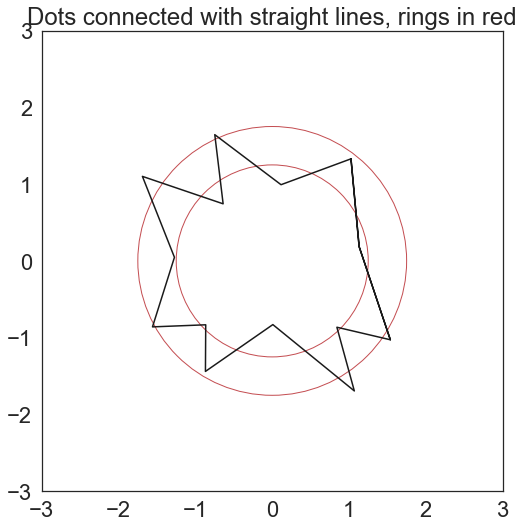

In [8]:
v=14
d=0.5

N=int(v/2) # number of points
D=d*1.3 # distance between rings
ts=[0,0.5,1] # tension parameter

# point radius tolerance, points are placed at the ring ± a radius tolerance following a normal with std=er:
er=0.2*D
# point angle tolerance, points are uniformly distributed along the circle ± an angle tolerance following a normal with std=ea:
ea=0.2*2*np.pi/float(N) 

# outer ring
ro=(1.5+D/2.)+er*np.random.randn(N) # outer radiuses
#ao=2*np.pi*np.random.rand()+np.linspace(0,2*np.pi*(N-1)/float(N),N)+ea*np.random.randn(N)
ao=np.linspace(0,2*np.pi*(N-1)/float(N),N)+ea*np.random.randn(N) # outer angles
ao.sort()
xo=ro*np.cos(ao)
yo=ro*np.sin(ao)

# inner ring
ri=(1.5-D/2)+er*np.random.randn(N) # inner radiuses
aux=np.array(list(ao[1:])+[ao[0]+2*np.pi])
ai=(aux+ao)/2 # inner angles = each point is placed between two outer points
xi=ri*np.cos(ai)
yi=ri*np.sin(ai)

X=[]
Y=[]
for i in range(N):
    X+=[xo[i], xi[i]]
    Y+=[yo[i], yi[i]]
    
X=X+X[:3] # duplicate first points at the end to ensure correct interpolation at the edges
Y=Y+Y[:3] # duplicate first points at the end to ensure correct interpolation at the edges

X=np.array(X)
Y=np.array(Y)

plt.figure(1,figsize=(8,8))
plt.plot(X,Y,'k')
circle1=plt.Circle((0, 0), 1.5+d/2, color='r', fill=False)
circle2=plt.Circle((0, 0), 1.5-d/2, color='r', fill=False)
ax = plt.gca()
ax.add_artist(circle1)
ax.add_artist(circle2)
plt.xlim((-3,3))
plt.ylim((-3,3))
ax.set_position([0.1,0.1,0.8,0.8])
plt.title('Dots connected with straight lines, rings in red')
plt.show()

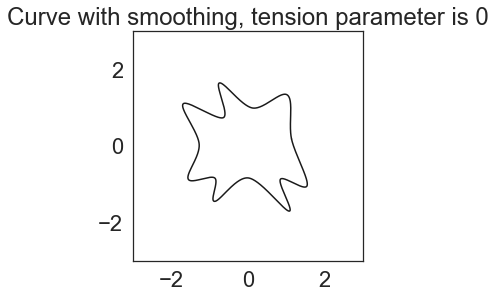

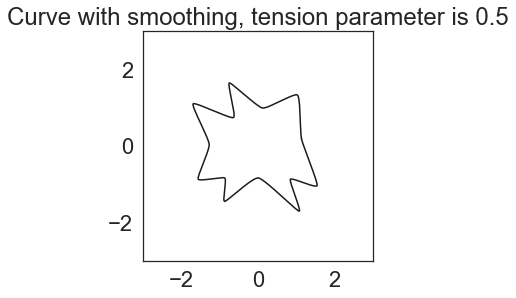

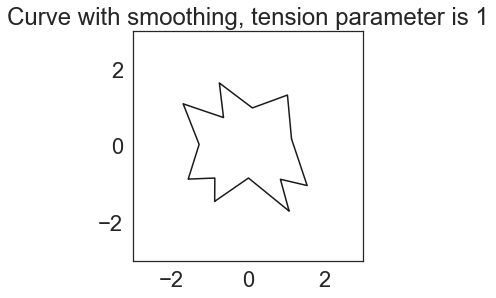

In [9]:
F=np.vstack((X,Y))
s=np.arange(F.shape[1]) # parametrisation of the curve F
F=F.transpose()

for t in ts:         

    Fn=cardinalCubicHermiteSpline(s,F,np.linspace(0,s.max(),10000),t=t,ends=False)
    
    plt.figure(t,figsize=(4,4))
    plt.plot(Fn[:,0],Fn[:,1],'k')
    ax = plt.gca()
    plt.xlim((-3,3))
    plt.ylim((-3,3))
    ax.set_position([0.1,0.1,0.8,0.8])
    plt.title('Curve with smoothing, tension parameter is '+str(round(t,2)))
    plt.show()

## Set generation

Definition of parameters to generate the whole set:

In [10]:
# Definition of parameters
vs=np.array([14,22]) # number of points
ds=np.array([0.1,0.5,1.0]) #distance between rings
ts=np.array([0.0,0.5,1.0]) # tension paramater linear spacing
#ts=np.log10(np.linspace(10**0.2,10**1,5)) # tension paramater logarithmic spacing

print("The number of vertices are: ")
for i in vs: print(i,end='   ')
print()
print("The distances between rings are: ")
for i in ds: print(round(i,2),end='   ')
print()
print("The tensions are: ")
for i in ts: print(round(i,2),end='   ')
print()

The number of vertices are: 
14   22   
The distances between rings are: 
0.1   0.5   1.0   
The tensions are: 
0.0   0.5   1.0   


Set generation:

In [11]:
for v in vs:
    N=int(v/2)
    for d in ds:    
        D=d*1.3
        # point radius tolerance, points are placed at the ring ± a radius tolerance following a normal with std=er:
        er=0.2*D
        # point angle tolerance, points are uniformly distributed along the circle ± an angle tolerance following a normal with std=ea:
        ea=0.2*2*np.pi/float(N) 
        
        # outer ring
        ro=(1.5+D/2.)+er*np.random.randn(N) # outer radiuses
        #ao=2*np.pi*np.random.rand()+np.linspace(0,2*np.pi*(N-1)/float(N),N)+ea*np.random.randn(N)
        ao=np.linspace(0,2*np.pi*(N-1)/float(N),N)+ea*np.random.randn(N) # outer angles
        ao.sort()
        xo=ro*np.cos(ao)
        yo=ro*np.sin(ao)

        # inner ring
        ri=(1.5-D/2)+er*np.random.randn(N) # inner radiuses
        aux=np.array(list(ao[1:])+[ao[0]+2*np.pi])
        ai=(aux+ao)/2 # inner angles = each point is placed between two outer points
        xi=ri*np.cos(ai)
        yi=ri*np.sin(ai)
        
        X=[]
        Y=[]
        for i in range(N):
            X+=[xo[i], xi[i]]
            Y+=[yo[i], yi[i]]
        
        X=X+X[:3] # duplicate first points at the end to ensure correct interpolation at the edges
        Y=Y+Y[:3] # duplicate first points at the end to ensure correct interpolation at the edges

        X=np.array(X)
        Y=np.array(Y)

        F=np.vstack((X,Y))
        s=np.arange(F.shape[1]) # parametrisation of the curve F
        F=np.transpose(F)
        
        for t in ts:         
            
            Fn=cardinalCubicHermiteSpline(s,F,np.linspace(0,s.max(),10000),t=t,ends=False)
            
            fig=plt.figure()
            plt.plot(Fn[:,0],Fn[:,1],'k')
            plt.xlim((-3,3))
            plt.ylim((-3,3))
            plt.xticks([])
            plt.yticks([])            
            ax=plt.gca()
            ax.set_position([0.1,0.1,0.8,0.8])
            ax.spines['right'].set_linewidth(0)
            ax.spines['left'].set_linewidth(0)
            ax.spines['top'].set_linewidth(0)
            ax.spines['bottom'].set_linewidth(0)
            fig.set_figheight(6)
            fig.set_figwidth(6)
            fig.savefig('stimulus_v'+str(v)+'_d{:0>2.0f}_t{:0>2.0f}'.format(10*d,10*t)+'.png',dpi=200)
            plt.close()

    Copyright (C) 2022, Manel Vila-Vidal
    Contact details: m@vila-vidal.com / manel.vila-vidal@upf.edu
    Date: 10 Mar 2022
    
    -----------------------------------------------------------------------

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.
    
    -----------------------------------------------------------------------
    
    If you use the source code, please make sure to reference both the
    package and the paper:
    
    > Vila-Vidal, M. (2022). Visual-Contour v1.0,
    https://github.com/compaes/Visual-Contour. Zenodo. (DOI)
    
    > REFERENCE PAPER